# Part 1: Loading datasets, cleaning and joining datasets

## 1.1 Loading Libraries

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import int64
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import plotly.express as px
from plotly.offline import plot
from bokeh.models.widgets import Panel, Tabs
from bokeh.plotting import figure
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, HoverTool, NumeralTickFormatter
from bokeh.io import output_file, show
from scipy.stats import iqr
import plotly.graph_objects as go



## Part 1.2: Loading datasets

In [2]:
#Reading required files for this assignment

covid_data_df = pd.read_csv('full_data.csv')
covid_vaccine_df = pd.read_csv('Bangladesh.csv')
covid_hospital_df = pd.read_csv('covid-hospitalizations.csv')

In [3]:
#print my three different dataframes to check all data

display(covid_data_df)

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2020-02-24,Afghanistan,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,0.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,0.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,0.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,0.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
173784,2022-04-16,Zimbabwe,0.0,0.0,247237.0,5462.0,312.0,5.0,756.0,16.0
173785,2022-04-17,Zimbabwe,41.0,1.0,247278.0,5463.0,320.0,6.0,753.0,17.0
173786,2022-04-18,Zimbabwe,19.0,1.0,247297.0,5464.0,287.0,4.0,685.0,13.0
173787,2022-04-19,Zimbabwe,0.0,0.0,247297.0,5464.0,203.0,4.0,553.0,13.0


In [4]:
display(covid_vaccine_df)

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Bangladesh,1/26/2021,Oxford/AstraZeneca,https://www.dhakatribune.com/health/coronaviru...,0,0,NaN,NaN
1,Bangladesh,1/27/2021,Oxford/AstraZeneca,https://www.dhakatribune.com/health/coronaviru...,26,26,NaN,NaN
2,Bangladesh,1/28/2021,Oxford/AstraZeneca,https://www.dhakatribune.com/health/coronaviru...,567,567,NaN,NaN
3,Bangladesh,2/7/2021,Oxford/AstraZeneca,https://bdnews24.com/bangladesh/2021/02/08/ban...,31160,31160,NaN,NaN
4,Bangladesh,2/9/2021,Oxford/AstraZeneca,https://www.dhakatribune.com/bangladesh/2021/0...,179318,179318,NaN,NaN
...,...,...,...,...,...,...,...,...
251,Bangladesh,4/11/2022,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",http://103.247.238.92/webportal/pages/covid19-...,254227836,128456500,115146677.0,10835694.0
252,Bangladesh,4/17/2022,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",http://103.247.238.92/webportal/pages/covid19-...,255102992,128566787,115489411.0,11259350.0
253,Bangladesh,4/18/2022,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",http://103.247.238.92/webportal/pages/covid19-...,255597907,128628475,115666598.0,11515635.0
254,Bangladesh,4/19/2022,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",http://103.247.238.92/webportal/pages/covid19-...,255808159,128642674,115738651.0,11639929.0


In [5]:
display(covid_hospital_df)

,entity,iso_code,date,indicator,value
0,Algeria,DZA,7/17/2020,Daily ICU occupancy,62.000
1,Algeria,DZA,7/17/2020,Daily ICU occupancy per million,1.390
2,Algeria,DZA,7/18/2020,Daily ICU occupancy,67.000
3,Algeria,DZA,7/18/2020,Daily ICU occupancy per million,1.502
4,Algeria,DZA,7/20/2020,Daily ICU occupancy,64.000
...,...,...,...,...,...
137953,United States,USA,4/19/2022,Daily ICU occupancy per million,4.491
137954,United States,USA,4/19/2022,Daily hospital occupancy,10745.000
137955,United States,USA,4/19/2022,Daily hospital occupancy per million,32.275
137956,United States,USA,4/19/2022,Weekly new hospital admissions,11476.000


## Part 1.3: Data cleaning

In [6]:
def clean_dataframe(input_df):
    """
    This function drops unnecessary columns, rename column names, filter the data, change datatypes
    input:  all three dataframe
    output: all three cleaned dataframe
    """
     #Rename different column 
    input_df.rename(columns={"entity": "location"}, errors='ignore', inplace=True)
    
    #Filtering data of Bangladesh for further use
    input_df = input_df[input_df['location'] == 'Bangladesh']
    
    #Drop unnecessary columns
    input_df.drop(columns=['source_url', 'location', 'iso_code', 'vaccine', 'biweekly_cases', 
                           'biweekly_deaths'], errors='ignore', inplace=True)
   
    #Change date column datatype 
    input_df["date"] = pd.to_datetime(input_df["date"], dayfirst=False)
    input_df = input_df[~(input_df['date'] > '2022-04-20')]

    return input_df

#Call the function to clean all dataframes 
clean_covid_data_df = clean_dataframe(covid_data_df)
clean_covid_vaccine_df = clean_dataframe(covid_vaccine_df)
clean_covid_hospital_df = clean_dataframe(covid_hospital_df)


# Creating new dataframes for convenience

hospital_df = clean_covid_hospital_df[clean_covid_hospital_df['indicator'] == 'Daily hospital occupancy']
#hosp_df.set_index(hosp_df['date'], inplace=True)

icu_df = clean_covid_hospital_df[clean_covid_hospital_df['indicator'] == 'Daily ICU occupancy']
#icu_df.set_index(icu_df['date'], inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP Pavilion Gaming\AppData\Local\Temp\ipykernel_13800\1984675664.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Part 1.4: Merging datasets

In [7]:
#Function to Merge dataframes
def merge_dataframes(first_df,second_df):
    final_dataframe = pd.merge(first_df, second_df, how="left", on=["date"])

    return final_dataframe

def merge_dataframes(first_df,second_df):
    final_dataframe_2 = pd.merge(first_df, second_df, how="left", on=["date"])

    return final_dataframe_2

#Call merge function to merge all three dataframes together 
final_dataframe = merge_dataframes(hospital_df, clean_covid_data_df)
final_dataframe = merge_dataframes(final_dataframe,clean_covid_vaccine_df)

final_dataframe_2 = merge_dataframes(icu_df, clean_covid_data_df)
final_dataframe_2 = merge_dataframes(final_dataframe_2,clean_covid_vaccine_df)

#set date as index
final_dataframe.set_index(final_dataframe['date'], inplace=True)
final_dataframe_2.set_index(final_dataframe_2['date'], inplace=True)

final_dataframe.drop(columns=['year', 'month'], errors='ignore', inplace=True)
final_dataframe_2.drop(columns=['year', 'month'], errors='ignore', inplace=True)

In [8]:
display(final_dataframe.head(5))
display(final_dataframe.dtypes)

,date,indicator,value,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
date,,,,,,,,,,,,,
2020-03-08,2020-03-08,Daily hospital occupancy,0.0,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-09,2020-03-09,Daily hospital occupancy,0.0,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-10,2020-03-10,Daily hospital occupancy,0.0,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-11,2020-03-11,Daily hospital occupancy,0.0,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-12,2020-03-12,Daily hospital occupancy,0.0,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


date                       datetime64[ns]
indicator                          object
value                             float64
new_cases                         float64
new_deaths                        float64
total_cases                       float64
total_deaths                      float64
weekly_cases                      float64
weekly_deaths                     float64
total_vaccinations                float64
people_vaccinated                 float64
people_fully_vaccinated           float64
total_boosters                    float64
dtype: object

In [9]:
display(final_dataframe_2.head(5))
display(final_dataframe_2.dtypes)

,date,indicator,value,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
date,,,,,,,,,,,,,
2020-03-08,2020-03-08,Daily ICU occupancy,0.0,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-09,2020-03-09,Daily ICU occupancy,0.0,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-10,2020-03-10,Daily ICU occupancy,0.0,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-11,2020-03-11,Daily ICU occupancy,0.0,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-12,2020-03-12,Daily ICU occupancy,0.0,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


date                       datetime64[ns]
indicator                          object
value                             float64
new_cases                         float64
new_deaths                        float64
total_cases                       float64
total_deaths                      float64
weekly_cases                      float64
weekly_deaths                     float64
total_vaccinations                float64
people_vaccinated                 float64
people_fully_vaccinated           float64
total_boosters                    float64
dtype: object

# Part 2: Interpolating data

In [10]:
# # Interpolate values to show a better estimation and statistics and differnet dates
final_dataframe['total_vaccinations'].interpolate(method='linear', limit_direction='forward', inplace=True)
final_dataframe['people_vaccinated'].interpolate(method='linear', limit_direction='forward', inplace=True)
final_dataframe['people_fully_vaccinated'].interpolate(method='linear', limit_direction='forward', inplace=True)
final_dataframe['total_boosters'].interpolate(method='linear', limit_direction='forward', inplace=True)

final_dataframe_2['total_vaccinations'].interpolate(method='linear', limit_direction='forward', inplace=True)
final_dataframe_2['people_vaccinated'].interpolate(method='linear', limit_direction='forward', inplace=True)
final_dataframe_2['people_fully_vaccinated'].interpolate(method='linear', limit_direction='forward', inplace=True)
final_dataframe_2['total_boosters'].interpolate(method='linear', limit_direction='forward', inplace=True)

# change Nan values in all columns to zero
final_dataframe = final_dataframe.fillna(0)
final_dataframe_2 = final_dataframe_2.fillna(0)

final_dataframe[["value", "new_cases","new_deaths", "total_cases","total_deaths", "weekly_cases", "weekly_deaths", "total_vaccinations","people_vaccinated",
                 "people_fully_vaccinated","total_boosters"]
               ] = final_dataframe[["value", "new_cases","new_deaths", "total_cases","total_deaths", "weekly_cases", "weekly_deaths", "total_vaccinations",
                                    "people_vaccinated","people_fully_vaccinated","total_boosters"]
                                  ].astype(int)

final_dataframe_2[["value", "new_cases","new_deaths", "total_cases","total_deaths", "weekly_cases", "weekly_deaths", "total_vaccinations","people_vaccinated",
                  "people_fully_vaccinated","total_boosters"]
                ] = final_dataframe_2[["value", "new_cases","new_deaths", "total_cases","total_deaths", "weekly_cases", "weekly_deaths", "total_vaccinations",
                                    "people_vaccinated","people_fully_vaccinated","total_boosters"]
                                   ].astype(int)

In [17]:
display(final_dataframe.dtypes)
display(final_dataframe.head(5))

date                       datetime64[ns]
indicator                          object
value                               int32
new_cases                           int32
new_deaths                          int32
total_cases                         int32
total_deaths                        int32
weekly_cases                        int32
weekly_deaths                       int32
total_vaccinations                  int32
people_vaccinated                   int32
people_fully_vaccinated             int32
total_boosters                      int32
dtype: object

,date,indicator,value,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
date,,,,,,,,,,,,,
2020-03-08,2020-03-08,Daily hospital occupancy,0,3,0,3,0,0,0,0,0,0,0
2020-03-09,2020-03-09,Daily hospital occupancy,0,0,0,3,0,0,0,0,0,0,0
2020-03-10,2020-03-10,Daily hospital occupancy,0,0,0,3,0,0,0,0,0,0,0
2020-03-11,2020-03-11,Daily hospital occupancy,0,0,0,3,0,0,0,0,0,0,0
2020-03-12,2020-03-12,Daily hospital occupancy,0,0,0,3,0,0,0,0,0,0,0


In [11]:
display(final_dataframe_2.dtypes)
display(final_dataframe_2.head(5))

date                       datetime64[ns]
indicator                          object
value                               int32
new_cases                           int32
new_deaths                          int32
total_cases                         int32
total_deaths                        int32
weekly_cases                        int32
weekly_deaths                       int32
total_vaccinations                  int32
people_vaccinated                   int32
people_fully_vaccinated             int32
total_boosters                      int32
dtype: object

,date,indicator,value,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
date,,,,,,,,,,,,,
2020-03-08,2020-03-08,Daily ICU occupancy,0,3,0,3,0,0,0,0,0,0,0
2020-03-09,2020-03-09,Daily ICU occupancy,0,0,0,3,0,0,0,0,0,0,0
2020-03-10,2020-03-10,Daily ICU occupancy,0,0,0,3,0,0,0,0,0,0,0
2020-03-11,2020-03-11,Daily ICU occupancy,0,0,0,3,0,0,0,0,0,0,0
2020-03-12,2020-03-12,Daily ICU occupancy,0,0,0,3,0,0,0,0,0,0,0


# Part 3: Visualization

In [12]:
#Making graph to show different info

#Make a hovertool
hover = HoverTool(mode = 'vline')
hover.tooltips = [('date', '@x{%F}'), ('patient', '@y')]
hover.formatters = {'@x': 'datetime'}


p1 = figure(plot_height=400,plot_width=950,x_axis_type = "datetime")
p1.line(final_dataframe.index, final_dataframe.new_cases, line_width=1.5, color="red", alpha=0.5)
tab1 = Panel(child=p1, title="Covid-19 positive Cases")
p1.add_tools(hover)
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Numbers of people'


p2 = figure(plot_height=400,plot_width=950,x_axis_type = "datetime")
p2.line(final_dataframe.index, final_dataframe.new_deaths, line_width=1.5, color="blue", alpha=0.5)
tab2 = Panel(child=p2, title="Covid-19 Deaths")
p2.add_tools(hover)
p2.xaxis.axis_label = 'Date'
p2.yaxis.axis_label = 'Numbers of people'


p3 = figure(plot_height=400,plot_width=950,x_axis_type = "datetime")
p3.line(final_dataframe.index, final_dataframe.value, line_width=1.5, color="navy", alpha=0.5)
tab3 = Panel(child=p3, title="Covid-19 General Hospitalization Rate")
p3.add_tools(hover)
p3.xaxis.axis_label = 'Date'
p3.yaxis.axis_label = 'Numbers of people'


p4 = figure(plot_height=400,plot_width=950,x_axis_type = "datetime")
p4.line(final_dataframe_2.index, final_dataframe_2.value, line_width=1.5, color="green", alpha=0.5)
tab4 = Panel(child=p4, title="Covid-19 ICU Occupancy Rate")
p4.add_tools(hover)
p4.xaxis.axis_label = 'Date'
p4.yaxis.axis_label = 'Numbers of people'


p5 = figure(plot_height=400,plot_width=950,x_axis_type = "datetime")
p5.line(final_dataframe.index, final_dataframe.weekly_cases, line_width=1.5, color="teal", alpha=0.5)
tab5 = Panel(child=p5, title="Covid-19 Weekly Cases")
p5.add_tools(hover)
p5.xaxis.axis_label = 'Date'
p5.yaxis.axis_label = 'Numbers of people'
p5.yaxis.formatter=NumeralTickFormatter(format="00")

p6 = figure(plot_height=400,plot_width=950,x_axis_type = "datetime")
p6.line(final_dataframe.index, final_dataframe.weekly_deaths, line_width=1.5, color="darkorange", alpha=0.5)
tab6 = Panel(child=p6, title="Covid-19 Weekly Deaths")
p6.add_tools(hover)
p6.xaxis.axis_label = 'Date'
p6.yaxis.axis_label = 'Numbers of people'


tabs = Tabs(tabs=[ tab1, tab2, tab3, tab4, tab5, tab6], sizing_mode='stretch_both')
layout = column(tabs)

show(layout)

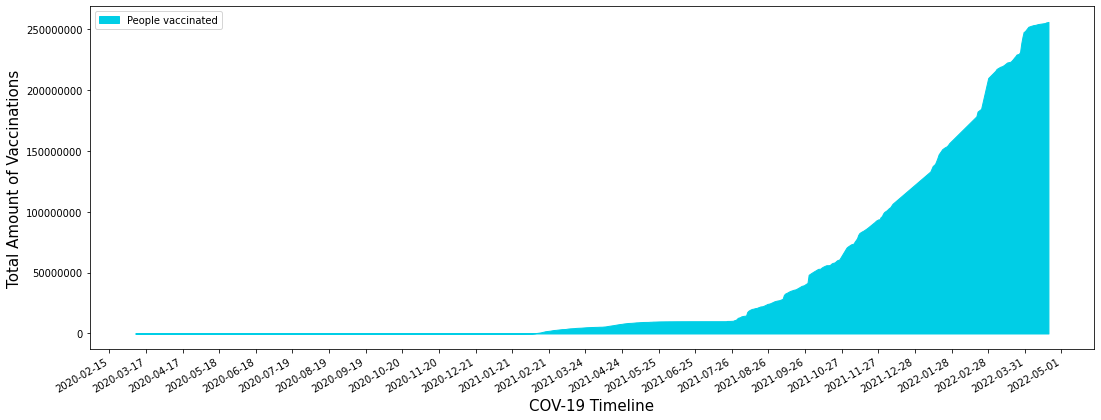

In [13]:
# plot to show total vaccinations

plt.figure(figsize=(18,7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=31))
plt.gca().ticklabel_format(axis='y', style='plain')
plt.fill_between(final_dataframe['date'], final_dataframe['total_vaccinations'], color="#00cee6",
                 alpha=1, label='People vaccinated')
plt.ylabel('Total Amount of Vaccinations', color = 'black', fontsize='15', horizontalalignment='center')
plt.xlabel('COV-19 Timeline', color = 'black', fontsize='15', horizontalalignment='center')
plt.gcf().autofmt_xdate()
plt.legend(loc='upper left')
plt.show()

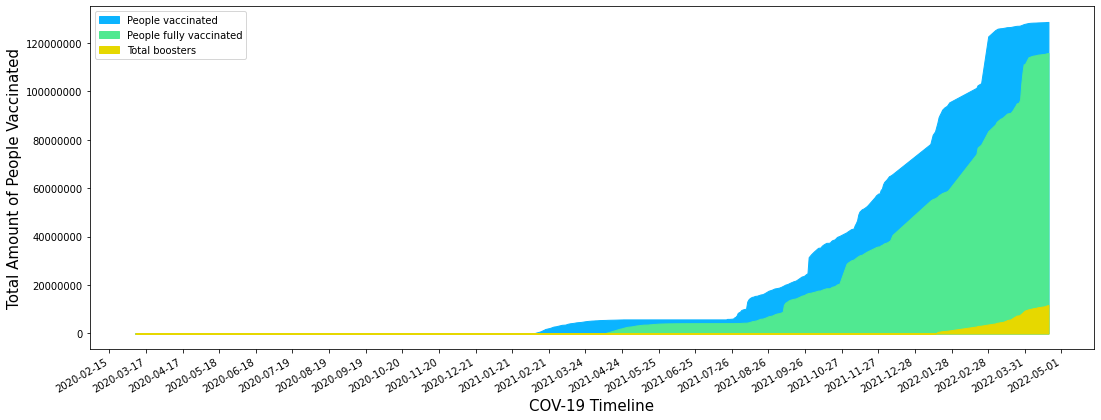

In [14]:
# plot to show different shots of vaccinations
plt.figure(figsize=(18,7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=31))
plt.gca().ticklabel_format(axis='y', style='plain')
plt.fill_between(final_dataframe_2['date'], final_dataframe_2['people_vaccinated'], color="#0bb4ff",
                 alpha=1, label='People vaccinated')
plt.fill_between(final_dataframe_2['date'], final_dataframe_2['people_fully_vaccinated'], color="#50e991",
                 alpha=1, label='People fully vaccinated')
plt.fill_between(final_dataframe_2['date'], final_dataframe_2['total_boosters'], color="#e6d800",
                 alpha=1, label='Total boosters')
plt.ylabel('Total Amount of People Vaccinated', color = 'black', fontsize='15', horizontalalignment='center')
plt.xlabel('COV-19 Timeline', color = 'black', fontsize='15', horizontalalignment='center')
plt.gcf().autofmt_xdate()
plt.legend(loc='upper left')
plt.show()

In [15]:
# Creating a column that has the year of each date recording
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
final_dataframe["year"] = final_dataframe.index.year
final_dataframe_2["year"] = final_dataframe_2.index.year

# Creating a column that has the month (1-12) of each date recording
final_dataframe["month"] = final_dataframe.index.month
final_dataframe_2["month"] = final_dataframe_2.index.month

# Mapping the month integers to their proper names
final_dataframe["month"] = final_dataframe["month"].apply(
    lambda data: months[data-1]
)
final_dataframe_2["month"] = final_dataframe_2["month"].apply(
    lambda data: months[data-1]
)

# Making this a categorical column so it can be sorted by the order of values i.e., the proper month order
final_dataframe["month"] = pd.Categorical(final_dataframe["month"], categories=months)
final_dataframe_2["month"] = pd.Categorical(final_dataframe_2["month"], categories=months)

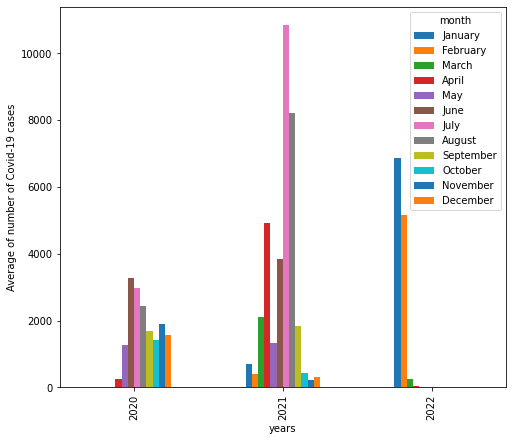

In [16]:
# Pivot the DF which helps to compare Covid-19 timeline
df_pivot = pd.pivot_table(final_dataframe,values="new_cases",index="year",columns="month",aggfunc=np.mean)
# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(8, 7)
# Change the axes labels
ax.set_xlabel("years")
ax.set_ylabel("Average of number of Covid-19 cases")
# Use this to show the plot in a new window
plt.show()

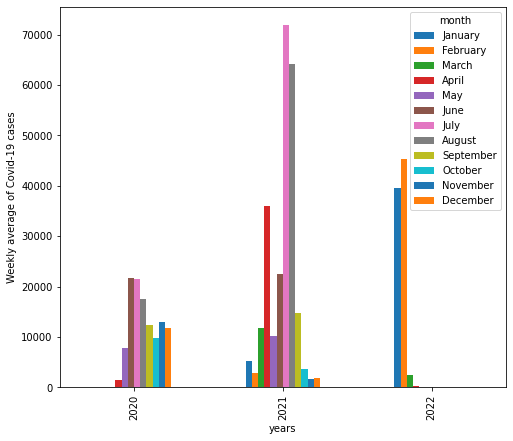

In [17]:
# Pivot the DF which helps to compare Covid-19 timeline
df_pivot = pd.pivot_table(final_dataframe,values="weekly_cases",index="year",columns="month",aggfunc=np.mean)
# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(8, 7)
# Change the axes labels
ax.set_xlabel("years")
ax.set_ylabel("Weekly average of Covid-19 cases")
# Use this to show the plot in a new window
plt.show()

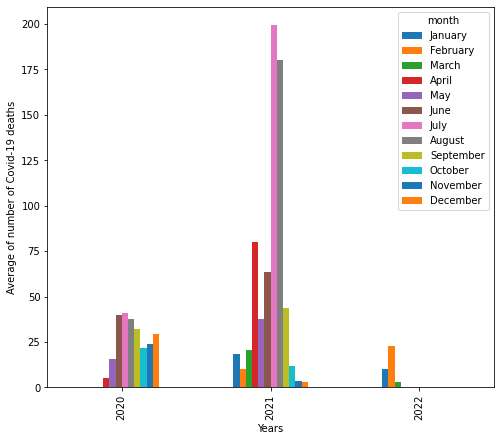

In [18]:
# Pivot the DF which helps to compare Covid-19 timelin
df_pivot = pd.pivot_table(final_dataframe,values="new_deaths",index="year",columns="month",aggfunc=np.mean)
# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(8, 7)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Average of number of Covid-19 deaths")
# Use this to show the plot in a new window
plt.show()

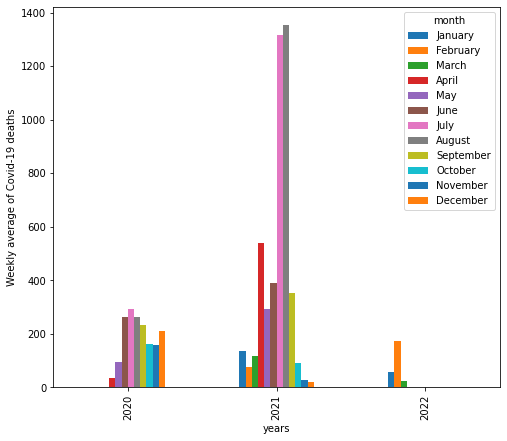

In [19]:
# Pivot the DF which helps to compare Covid-19 timeline
df_pivot = pd.pivot_table(final_dataframe,values="weekly_deaths",index="year",columns="month",aggfunc=np.mean)
# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(8, 7)
# Change the axes labels
ax.set_xlabel("years")
ax.set_ylabel("Weekly average of Covid-19 deaths")
# Use this to show the plot in a new window
plt.show()

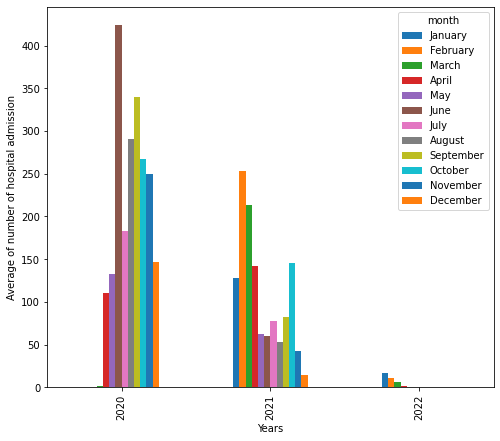

In [20]:
# Pivot the DF which helps to compare Covid-19 timelin
df_pivot = pd.pivot_table(final_dataframe,values="value",index="year",columns="month",aggfunc=np.mean)
# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(8, 7)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Average of number of hospital admission")
# Use this to show the plot in a new window
plt.show()

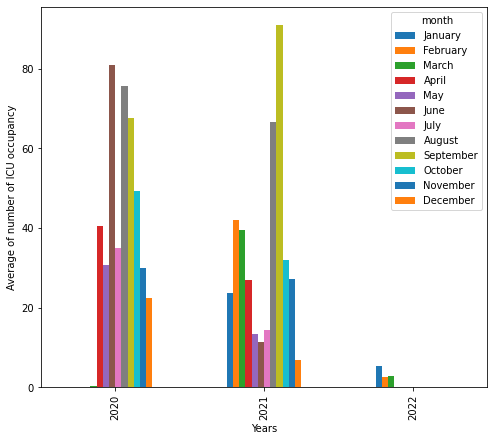

In [21]:
# Pivot the DF which helps to compare Covid-19 timelin
df_pivot = pd.pivot_table(final_dataframe_2,values="value",index="year",columns="month",aggfunc=np.mean)
# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(8, 7)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Average of number of ICU occupancy")
# Use this to show the plot in a new window
plt.show()

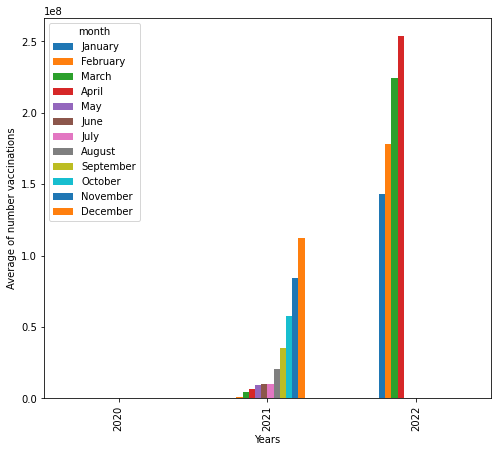

In [22]:
# Pivot the DF which helps to compare Covid-19 timelin
df_pivot = pd.pivot_table(final_dataframe_2,values="total_vaccinations",index="year",columns="month",aggfunc=np.mean)
# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(8, 7)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Average of number vaccinations")
# Use this to show the plot in a new window
plt.show()

In [23]:
#Making a new dataframe to show percentage of changes in the data

percentage_dataframe =final_dataframe[['date','new_cases','new_deaths', 'weekly_cases', 'weekly_deaths', 'value']].groupby(final_dataframe['date'].dt.to_period('m')).sum().reset_index()
percentage_dataframe_2 =final_dataframe_2[['date','new_cases','new_deaths', 'value']].groupby(final_dataframe_2['date'].dt.to_period('m')).sum().reset_index()
percentage_dataframe['Covid_death_percentage'] = ((percentage_dataframe['new_deaths'] / percentage_dataframe['new_cases']) *100).round(2)
percentage_dataframe['Covid_weekly_death_percentage'] = ((percentage_dataframe['weekly_deaths'] / percentage_dataframe['weekly_cases']) *100).round(2)
percentage_dataframe['Covid_patient_percentage'] = ((percentage_dataframe['new_cases'] / 180000000) *100).round(2)
percentage_dataframe['Covid_weekly_patient_percentage'] = ((percentage_dataframe['weekly_cases'] / 180000000) *100).round(2)
percentage_dataframe['Covid_hospitalize_percentage'] = ((percentage_dataframe['value'] / percentage_dataframe['new_cases']) *100).round(2)
percentage_dataframe_2['Covid_icu_percentage'] = ((percentage_dataframe_2['value'] / percentage_dataframe_2['new_cases']) *100).round(2)


percentage_dataframe['date'] = percentage_dataframe['date'].astype(str)
percentage_dataframe['date'] = pd.to_datetime(percentage_dataframe['date'])
percentage_dataframe['date'] = percentage_dataframe['date'].dt.strftime('%B-%Y')
percentage_dataframe.drop(columns=['new_deaths', 'new_cases', 'weekly_cases', 'weekly_deaths', 'value'], errors='ignore', inplace=True)

percentage_dataframe_2['date'] = percentage_dataframe_2['date'].astype(str)
percentage_dataframe_2['date'] = pd.to_datetime(percentage_dataframe_2['date'])
percentage_dataframe_2['date'] = percentage_dataframe_2['date'].dt.strftime('%B-%Y')
percentage_dataframe_2.drop(columns=['new_deaths', 'new_cases',  'value'], errors='ignore', inplace=True)


In [24]:
display(percentage_dataframe.head(5))

,date,Covid_death_percentage,Covid_weekly_death_percentage,Covid_patient_percentage,Covid_weekly_patient_percentage,Covid_hospitalize_percentage
0,March-2020,9.80,8.97,0.00,0.00,50.98
1,April-2020,2.14,2.43,0.00,0.02,43.53
2,May-2020,1.22,1.20,0.02,0.14,10.46
3,June-2020,1.22,1.22,0.05,0.35,12.95
4,July-2020,1.37,1.36,0.05,0.37,6.15


In [25]:
display(percentage_dataframe_2.head(5))

,date,Covid_icu_percentage
0,March-2020,11.76
1,April-2020,15.98
2,May-2020,2.41
3,June-2020,2.47
4,July-2020,1.18


In [27]:
fig = go.Figure(data=[go.Table(
    header=dict(values=('Month','Percentage of Daily Death',
                        'Percentage of Daily Patient',
                       'Percentage of Hospital Patient',
                       'Percentage of ICU Patient',
                       'Percentage of Covid Weekly Cases ',
                       'Percentage of Covid Weekly Deaths', 
                        ),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[percentage_dataframe.date,percentage_dataframe.Covid_death_percentage,percentage_dataframe.Covid_patient_percentage, 
                       percentage_dataframe.Covid_hospitalize_percentage, percentage_dataframe_2.Covid_icu_percentage,percentage_dataframe.Covid_weekly_patient_percentage, percentage_dataframe.Covid_weekly_death_percentage
                       
                       ],
               fill_color='lavender',
               align='left'))
])
fig.update_layout(width=1100, height=1000)
fig.show()

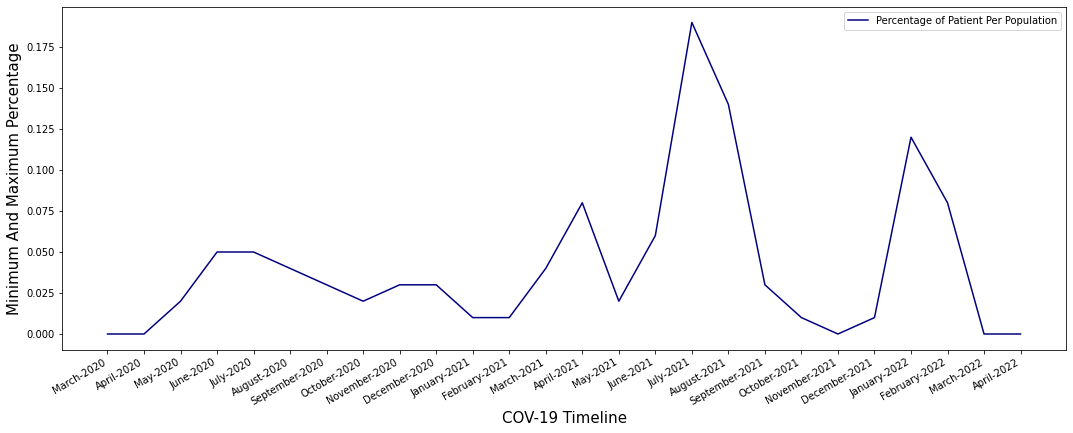

In [28]:
plt.figure(figsize=(18,7))
plt.plot(percentage_dataframe.date, percentage_dataframe.Covid_patient_percentage, color="navy", label = "Percentage of Patient Per Population")
plt.legend()
plt.ylabel('Minimum And Maximum Percentage', color = 'black', fontsize='15', horizontalalignment='center')
plt.xlabel('COV-19 Timeline', color = 'black', fontsize='15', horizontalalignment='center')
plt.gcf().autofmt_xdate()
plt.show()

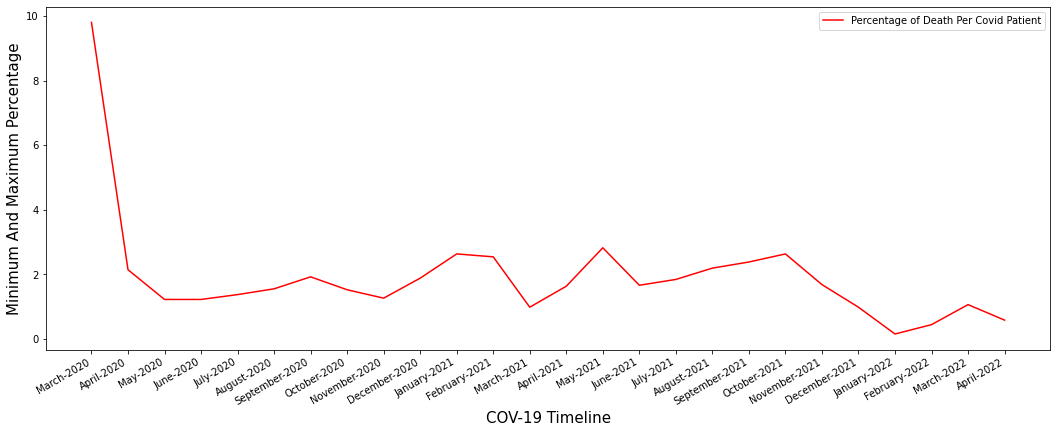

In [29]:
plt.figure(figsize=(18,7))
plt.plot(percentage_dataframe.date, percentage_dataframe.Covid_death_percentage, color="red", label = "Percentage of Death Per Covid Patient")
plt.legend()
plt.ylabel('Minimum And Maximum Percentage', color = 'black', fontsize='15', horizontalalignment='center')
plt.xlabel('COV-19 Timeline', color = 'black', fontsize='15', horizontalalignment='center')
plt.gcf().autofmt_xdate()
plt.show()

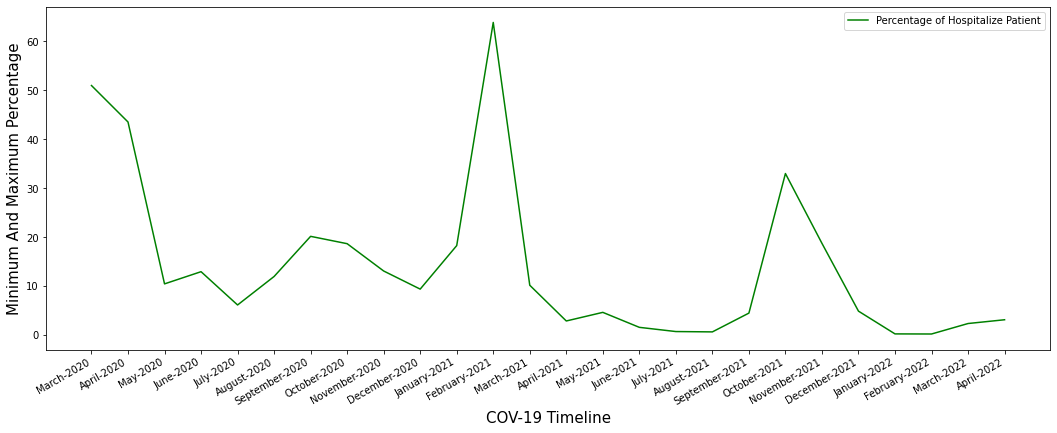

In [30]:
plt.figure(figsize=(18,7))
plt.plot(percentage_dataframe.date, percentage_dataframe.Covid_hospitalize_percentage, color="green", label = "Percentage of Hospitalize Patient")
plt.legend()
plt.ylabel('Minimum And Maximum Percentage', color = 'black', fontsize='15', horizontalalignment='center')
plt.xlabel('COV-19 Timeline', color = 'black', fontsize='15', horizontalalignment='center')
plt.gcf().autofmt_xdate()
plt.show()

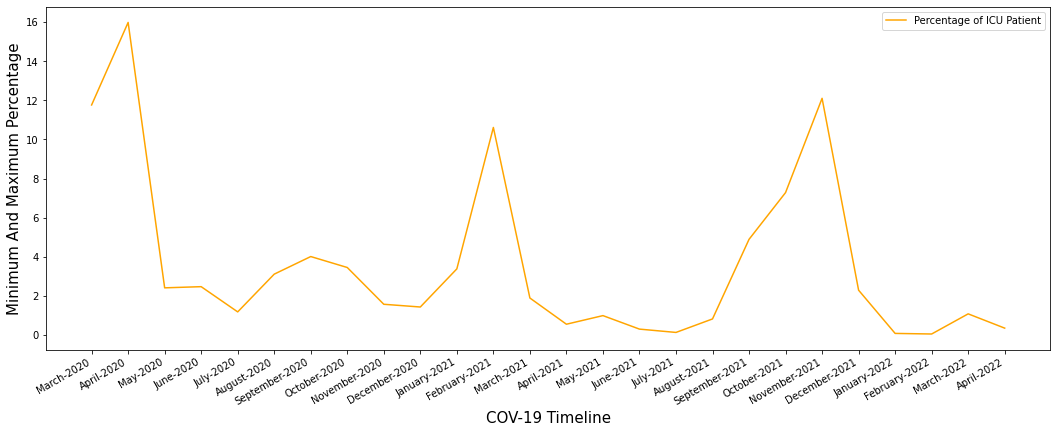

In [31]:
plt.figure(figsize=(18,7))
plt.plot(percentage_dataframe_2.date, percentage_dataframe_2.Covid_icu_percentage, color="orange", label = "Percentage of ICU Patient")
plt.legend()
plt.ylabel('Minimum And Maximum Percentage', color = 'black', fontsize='15', horizontalalignment='center')
plt.xlabel('COV-19 Timeline', color = 'black', fontsize='15', horizontalalignment='center')
plt.gcf().autofmt_xdate()
plt.show()